# MODELING ROTATIONAL CURVE OF MILKY WAY GALAXY 

### Project Members: Abdul Choudhry, Adyant Kamdar, Ben Ormond

The goal of this project is to model the actual rotational curves of the Milky Way galaxy and prove the necessity of including dark matter into today's galactic models. This will be done by first plotting the rotational curves of a Keplerian galaxy that does not have any dark matter present. A poisson function was used to distribute the mass across the galaxy accurately, then the equation for orbital velocities was used to get a list of orbital velocities at particular radii based on the set of masses. This was plotted to represent Kepler's rotational curves of the Milky Way. Next, an additional ring of dark matter was added to the model and the mass distribution was changed accordingly. New rotational velocities were plotted  compared and to the true rotational velocities of the Milky Way. The similarities in shape and values indicated that without the addition dark matter, galaxies today would not be able to maintain their shape or exist. This was reinforced by our visual galactic model that took the shape of a spiral galaxy (The Milky Way), only when dark matter was added.

In [1]:
import random
from math import *
from pylab import *
import numpy as np
import scipy as sp
import scipy.misc as spm
import matplotlib.pyplot as plt
import matplotlib.patches as pat
from operator import add, sub
from IPython.display import Image

/srv/app/venv/lib/python3.6/site-packages/ipykernel_launcher.py:15: DeprecationWarning: `factorial` is deprecated!
Importing `factorial` from scipy.misc is deprecated in scipy 1.0.0. Use `scipy.special.factorial` instead.
  from ipykernel import kernelapp as app


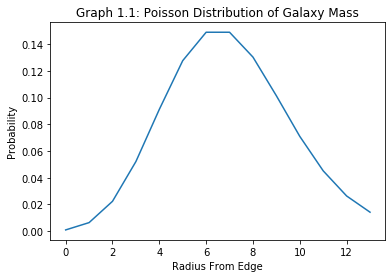

Sum of all mass probabilities:  0.9871886071965803

Total mass of galaxy:   1150000000000.0 Solar Masses
Mass of dark matter:    1092500000000.0 Solar Masses
Mass of luminous matter:  57500000000.0 Solar Masses


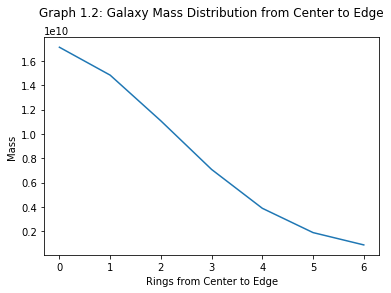

In [2]:
#Based on a total mass of 1.15e12 solar masses (modeling of the Milky Way)
#distributed on the basis of a poisson curve 

#The distributions of mass are based with a center and 7 rings around it. However, the poisson
#distribution treats the distribution as one center and 7 divisions on each side (so 14 in total.
#This is also why the poisson is symmetric because the mass on each ring is the same on either side of the center)

totalmass = 1.15e12 
#McMillan, P. J. (July 2011). "Mass models of the Milky Way". 
#Monthly Notices of the Royal Astronomical Society. 414 (3): 
#2446–2457. arXiv:1102.4340. Bibcode:2011MNRAS.414.2446M. 
#doi:10.1111/j.1365-2966.2011.18564.x

def Poisson(mu,x): #https://arxiv.org/ftp/arxiv/papers/1612/1612.07781.pdf
    k = (e**(-mu) * (mu**x))/spm.factorial(x)
    return k

x = np.arange(0,14)#last number is not included in the range
y = Poisson(7,x)#x being intervals, centered around 7
plt.plot(x,y)
plt.title("Graph 1.1: Poisson Distribution of Galaxy Mass")
plt.xlabel("Radius From Edge")
plt.ylabel("Probability")
plt.show() #7 on the x-axis represents the center of the galaxy with the highest (probable) amount of mass

Prob_of_Mass = []

for i in range(0,14):
    k = Poisson(7,i)
    Prob_of_Mass.append(k)

print("Sum of all mass probabilities: ", np.sum(Prob_of_Mass)) #sum adds up to 0.987 with the probability that mass lies outside this marked region of the galaxy
#at 0.013
#From above
darkmattermass = .95*totalmass 
luminousmattermass = .05*totalmass
#Kafle, P.R.; Sharma, S.; Lewis, G.F.; Bland-Hawthorn, J. (2014).
#"On the Shoulders of Giants: Properties of the Stellar Halo and the 
#Milky Way Mass Distribution". The Astrophysical Journal. 794 (1):
#17. arXiv:1408.1787. Bibcode:2014ApJ...794...59K
#. doi:10.1088/0004-637X/794/1/59

#Therefore the mass distribution of our galaxy is:
Mass = luminousmattermass * np.array(Prob_of_Mass)

#Mass distribution of each ring will be the first and last elements of the Mass array being added together due to symmetry of the
#rings
Mass_per_ring = []
rings = np.arange(0,7)
for i in range(0, 7):
    Mass_per_ring.append(Mass[i] + Mass[-i - 1])

Mass_per_ring.sort(reverse=True)
plt.plot(rings, Mass_per_ring)
plt.title("Graph 1.2: Galaxy Mass Distribution from Center to Edge\n")
plt.xlabel("Rings from Center to Edge")
plt.ylabel("Mass")

print("\nTotal mass of galaxy:  ", totalmass, "Solar Masses")
print("Mass of dark matter:   ", darkmattermass, "Solar Masses")
print("Mass of luminous matter: ", luminousmattermass, "Solar Masses")
#Thus for each ring, the corresponding masses are given by the Mass_per_ring list, with the first element being the mass of the 
#first ring. The mass of the center is given by the middle value of the array Mass[7], this will be used later to plot orbital
#velocities within the center

A =  1
B =  0.5
N =  4


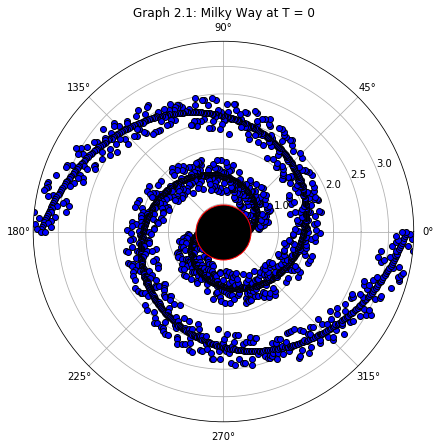

In [3]:
quarterofpoints=500 #Represents 1/4 of all the points made, where each point is a collection of stars

A=1 #Constants to be used to define galaxy shape
B=.5
N=4
counter = 0

print("A = ", A)
print("B = ", B)
print("N = ", 4)

stars = []
velocities = []

def galaxyshape(phi): #Defines the galaxy shape depending on given constants

    #https://arxiv.org/ftp/arxiv/papers/0908/0908.0892.pdf
    radius = A/np.log10(B*np.tan(phi/(2*N)))
    return radius


#The below comments are an alternative way to represent the spiral shape
# x=a*np.e**(b*angle)*cos(angle)
# y=a*np.e**(b*angle)*sin(angle)
# x1=a*np.e**(b*angle)*cos(angle+pi)
# y1=a*np.e**(b*angle)*sin(angle+pi)

# sx=np.random.normal(0, a*0.25, n)
# sy=np.random.normal(0, a*0.25, n)

# xcoords = x+sx
# ycoords = y+sy
# x1coords = x1 + sx
# y1coords = y1 + sy
# xcoords = np.concatenate((xcoords, x1coords), axis = 0)
# ycoords = np.concatenate((ycoords, y1coords), axis = 0)

omega=[]
radii = []
pointmass = []
randomradii = []
ops = (add, sub)
originalthetas = []
theta_range = np.linspace(1e-15, 2*np.pi, quarterofpoints)

for i in range(quarterofpoints):
    
    # radii.append(np.sqrt(xcoords[i]**2 + ycoords[i]**2))
    # theta.append(np.arctan2(ycoords[i], xcoords[i]))
    
    radii.append(np.abs(galaxyshape(theta_range[i]))) #List of radii by plugging in "quarterofpoints" to shape equation
    omega.append(0) #All omegas are by default 0
    pointmass.append(0) #Each point begins with 0 mass, but is changed later
    op = np.random.choice(ops) #Chooses addition or subtraction randomly
    randomradii.append(np.abs(op(radii[i], np.random.random() * .30))) #Creates a list of random radii using random ops
    #The number ".30" represents the degree of randomness - the larger the number, the more space between points
    
    part1 = [] #Part 1 is the first arm of the galaxy
    part1.append(radii[i]) #Each part appends the radii, theta, omega, and mass of each point
    part1.append(theta_range[i])
    originalthetas.append(theta_range[i])
    part1.append(omega[i])
    part1.append(pointmass[i])
    
    stars.append(part1) #Stars is a full dataset of every point in the model galaxy

    part2 = [] #Part 2 is the second arm of the galaxy, symmetrical to the first
    part2.append(radii[i])
    part2.append(theta_range[i] + np.pi)
    originalthetas.append(theta_range[i] + np.pi) #Rotated about the origin
    part2.append(omega[i])
    part2.append(pointmass[i])
    
    stars.append(part2)
    
    part3 = [] #Part 3 is the same as part 1, but using random points
    part3.append(randomradii[i])
    part3.append(theta_range[i])
    originalthetas.append(theta_range[i])
    part3.append(omega[i])
    part3.append(pointmass[i])
    
    stars.append(part3)
    
    part4 = [] #Part 4 is the same as part 2, but using random points
    part4.append(randomradii[i])
    part4.append(theta_range[i] + np.pi)
    originalthetas.append(theta_range[i] + np.pi)
    part4.append(omega[i])
    part4.append(pointmass[i])
    
    stars.append(part4)

def movestars(t): #Plots every single point on a single polar graph at time "t" using given orbital velocities
    
    plt.figure(figsize = (7, 7))
    global counter
    counter+=1
    for i in range(len(stars)):
        
        phi = stars[i][2] * t #Amount each point is rotated (omega*t = phi)
        stars[i][1] = originalthetas[i] + phi #Rotates each point using phi+theta
        
        
        plt.polar(stars[i][1], stars[i][0], "bo", markeredgecolor = "black") #Polar point

    plt.polar(0, 0, "o", color = "black", markersize=55, markeredgecolor = "red") #Center of galaxy
    plt.margins(0)
    plt.title("Graph 2.%.0i: Milky Way at T = %.0f" % (counter, t))

movestars(0) #Resets each theta to 0

plt.show()

#This is the visualization of the galaxy and all models of mass and orbital velocity will be based off the radii of the graph below.

In [4]:
stars_per_ring = np.zeros(7) #This section finds the number of points located in each particular radius
for i in range(len(stars)):
    
    
    if (-1<=stars[i][0]<.5): #In range -1, .5
        stars_per_ring[0]+=1
    if (.5<=stars[i][0]<1.0): #.5, 1
        stars_per_ring[1]+=1
    if (1.0<=stars[i][0]<1.5): #etc.
        stars_per_ring[2]+=1
    if (1.5<=stars[i][0]<2.0):
        stars_per_ring[3]+=1
    if (2.0<=stars[i][0]<2.5):
        stars_per_ring[4]+=1
    if (2.5<=stars[i][0]<3.0):
        stars_per_ring[5]+=1
    if (3.0<=stars[i][0]<=5):
        stars_per_ring[6]+=1
        
print("Number of Stars per Ring: \n", stars_per_ring)

Number of Stars per Ring: 
 [ 74. 446. 512. 384. 302. 182. 100.]


One Ring Radius =  2.189717088552159 kpc
Orbital Velocities: 
 [  0.         255.59001039 145.7253882  109.8366147   79.42919914
  63.72276779  53.3014337 ]


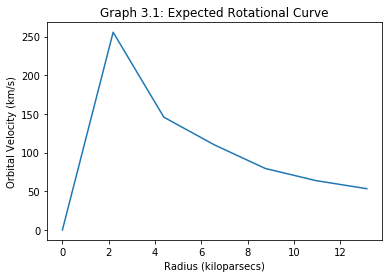

Image 1: Expected Rotational Curve With Keplerian Motion


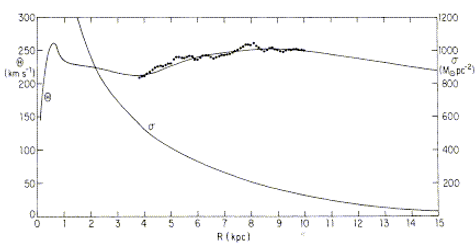

In [5]:
#Finding the velocities at the radius of each ring using the formula for velocity based on radius and mass
G = 6.67e-11 #Units of G using parsecs and solar masses

def Orbital_Velocity(M,r,spr):
    mass_in_kg = M*1.989e30 #Converting the Total Mass INCLUDING DARK MATTER to kilograms 
    num_points = spr #points per ring
    stars_per_point = 1e6 #Total number of stars located within each point in the arms of the Milky way
    radius_in_km = r * 3.086e16 #Converting radius of galaxy to km

    V = np.sqrt(G*(mass_in_kg/num_points/stars_per_point)/(radius_in_km)) #formula for orbital veloctiy for each point
    return V

Lightyear_Diameter = 100000 #diameter of the milky way in light years, since mass of the milky way was used for the earlier 
#estimate the the length will be used as this estimate

#1 parsec = 3.262
Diameter = (Lightyear_Diameter/3.262)/1000 #This is the diameter in kiloparsecs

#There are 7 rings so radius is half the diameter, R1 to the first ring is:
R = Diameter/2
R1 = R/7
print("One Ring Radius = ", R1, "kpc")
#All the distances to each concentric circle are uniform so R2 = R1 + R1, R3 = R1 + R1+ R1, etc.

Radius_set = []
for i in range(0,7): #There are 7 radiuses and the first radius is from the edge of the center to the first radius
    l = R1*i
    Radius_set.append(l)


Mass_radius = np.array(Mass_per_ring)
Radii = np.array(Radius_set)

b=np.zeros(7)
a = Radii
b[1:8] = Orbital_Velocity(Mass_radius[1:8], a[1:8], stars_per_ring[1:8])
b[0] = 0
print("Orbital Velocities: \n", b)
plt.plot(a,b)
plt.title("Graph 3.1: Expected Rotational Curve")
plt.ylabel('Orbital Velocity (km/s)')
plt.xlabel('Radius (kiloparsecs)')

#The inner velocity follows rigid body rotation, where orbital velocity scales linearly with r (first ring)
#The outer velocity follows the function above

plt.show()
print("Image 1: Expected Rotational Curve With Keplerian Motion")
Image(filename = 'WithoutDarkMatter.png', width=500,height=500)


Visualization of Milky Way Given Keplerian Orbital Velocities


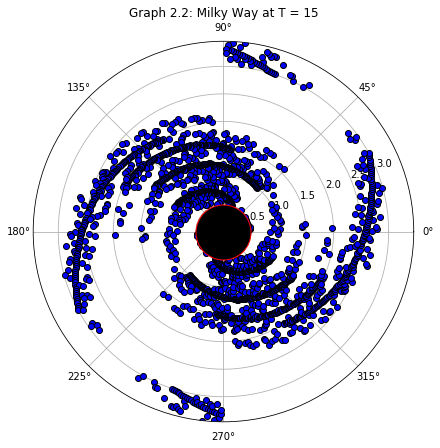

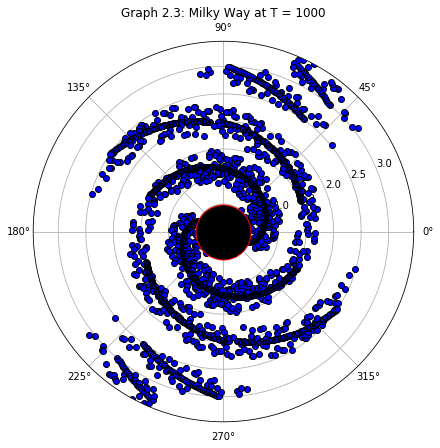

In [6]:
print("Visualization of Milky Way Given Keplerian Orbital Velocities")
def orbital_vs(b):
    for i in range(len(stars)):   #Function for appending the orbital velocity to each point based on radius
        if (-1<=stars[i][0]<.5):  #In radius -1,.5
            stars[i][2]=b[0]
        if (.5<=stars[i][0]<1.0): #.5, 1.0
            stars[i][2]=b[1]
        if (1.0<=stars[i][0]<1.5): #etc
            stars[i][2]=b[2]
        if (1.5<=stars[i][0]<2.0):
            stars[i][2]=b[3]
        if (2.0<=stars[i][0]<2.5):
            stars[i][2]=b[4]
        if (2.5<=stars[i][0]<3.0):
            stars[i][2]=b[5]
        if (3.0<=stars[i][0]<=5):
            stars[i][2]=b[6]

orbital_vs(b)
movestars(15)
movestars(1000)

In [7]:
# def distribute_mass(ringmass, num):
#     r = np.random.multinomial(int(ringmass), np.ones(num)/num, size=1)[0]
#     return r

def distribute_mass(ringmass, numstars): #This part isn't absolutely necessary, but it adds a set of data for each point
#The function randomly distributes the mass of each ring into each individual point 
#The mass given to each point is roughly how many stars are represented by that point
    rands = np.random.sample(numstars)
    randsum = sum(rands)
    r = [rands[i]*ringmass/randsum for i in range(len(rands))]
    return r

mass_per_star = []
for i in range(7): #Creates a list of lists of masses for each star in each ring
    mass_per_star.append(distribute_mass(Mass_per_ring[i], int(stars_per_ring[i])))
    

flat_mass_per_star = [i for j in mass_per_star for i in j]
#Flattens the list from before, then appends it to each point dataset 

for i in range(len(stars)): 
    stars[i][3]=(flat_mass_per_star[i])

    
def printpoint(num): #Formatting to output each point with radius, theta, and mass
    print  (str('Point:').rjust(14), repr(num).rjust(7), 
           str("Radius (kpc):").rjust(14), repr(round(stars[num][0] * 4, 4)).rjust(7),
           str("Theta (rad):").rjust(14), repr(round(stars[num][1], 4)).rjust(12),
           str("Mass: (SM)").rjust(14), repr(int(stars[num][3])).rjust(7))
    
printpoint(20)
printpoint(305)
printpoint(1977)

        Point:      20  Radius (kpc):  1.6632   Theta (rad):        0.063     Mass: (SM) 121907925
        Point:     305  Radius (kpc):  3.2756   Theta (rad):  255594.1089     Mass: (SM) 7179339
        Point:    1977  Radius (kpc): 12.9927   Theta (rad):   53310.7955     Mass: (SM) 13511533


Sum of mass probabilities:  0.999359430359829


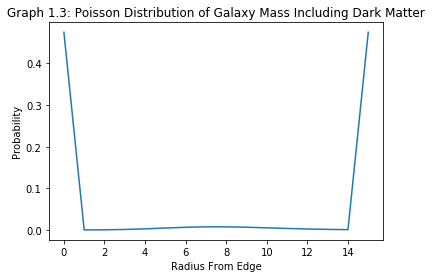

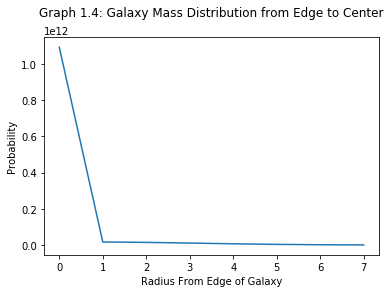

In [8]:
dark_x=np.arange(0,16)

Dark_Prob_of_Mass = np.zeros(16)
for i in range(14):
    Dark_Prob_of_Mass[i+1] = .05*Prob_of_Mass[i] #5% luminous matter
Dark_Prob_of_Mass[0] = .475 #95% Dark Matter
Dark_Prob_of_Mass[15] = .475
    
print("Sum of mass probabilities: ", np.sum(Dark_Prob_of_Mass)) #sum adds up to 0.994 with the probability that mass lies outside this marked region of the galaxy

#Therefore the mass distribution of our galaxy is:
New_Mass = np.zeros(16)
for i in range(14):
    New_Mass[i+1] = Mass[i]
New_Mass[0] = .5 * darkmattermass
New_Mass[15] = .5 * darkmattermass
    

#plt.plot(dark_x,New_Mass)

#Mass distribution of each ring will be the first and last elements of the Mass array being added together due to symmetry of the
#rings
Dark_Mass_per_ring = []
mass_x = np.arange(0,8)

for i in range(0, 8):
    Dark_Mass_per_ring.append(New_Mass[i] + New_Mass[-i - 1])
    
Dark_Mass_per_ring.sort(reverse=True)

plt.plot(dark_x, Dark_Prob_of_Mass)
plt.title("Graph 1.3: Poisson Distribution of Galaxy Mass Including Dark Matter")
plt.xlabel("Radius From Edge")
plt.ylabel("Probability")
plt.figure()
plt.plot(mass_x, Dark_Mass_per_ring)
plt.title("Graph 1.4: Galaxy Mass Distribution from Edge to Center\n")
plt.xlabel("Radius From Edge of Galaxy")
plt.ylabel("Probability")
plt.show() #7 on the x-axis represents the center of the galaxy with the highest (probable) amount of mass



In [9]:
dark_stars_per_ring = np.zeros(8)
for i in range(len(stars_per_ring)):
    dark_stars_per_ring[i] = stars_per_ring[i]
dark_stars_per_ring[7] = 0
print("Number of Stars per Ring (With Dark Matter) \n", dark_stars_per_ring)

Number of Stars per Ring (With Dark Matter) 
 [ 74. 446. 512. 384. 302. 182. 100.   0.]


Orbital Velocities With Dark Matter: 
 [  0.         268.02318905 164.61396553 134.08009536 163.94479046
 163.94479046 163.94479046]


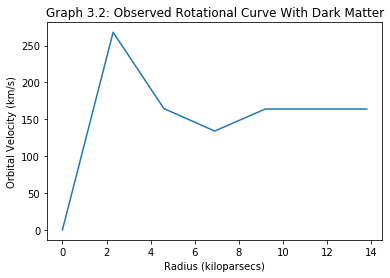

Image 2: Empirically Observed Rotational Curve


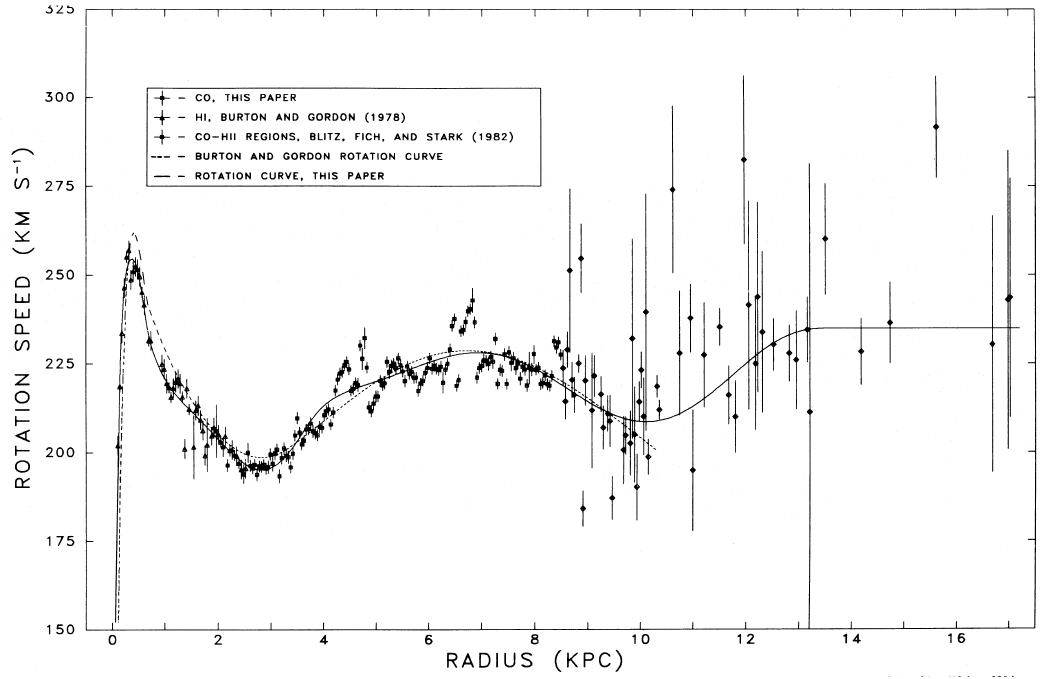

In [10]:
Lightyear_Diameter = 120000 #diameter of the milky way in light years, since mass of the milky way was used for the earlier 
#estimate the the length will be used as this estimate

#1 parsec = 3.262
Diameter = (Lightyear_Diameter/3.262)/1000 #This is the diameter in kiloparsecs
#There are 8 rings so radius is half the diameter, R1 to the first ring is:
R = Diameter/2
Dark_R1 = R/8
#All the distances to each concentric circle are uniform so R2 = R1 + R1, R3 = R1 + R1+ R1, etc.


def Dark_Orbital_Velocity(M,r,spr):
    mass_in_kg = totalmass*1.989e30 #Converting totalmass to kilograms INCLUDING DARK MATTER
    num_points = len(stars)
    stars_per_point = 5.0e6 #Total number of stars located within the arms of the Milky way (approximating 1/25)
    radius_in_km = R * 3.086e16 #Converting radius of galaxy to km

    V = np.sqrt(G * (mass_in_kg/(num_points * stars_per_point)) / (radius_in_km)) #formula for orbital veloctiy for each point
    return V



Dark_Radius_set = []
for i in range(0,8): #There are 8 radiuses and the first radius is from the edge of the center to the first radius
    l = Dark_R1*i
    Dark_Radius_set.append(l)


Dark_Mass_radius = np.array(Dark_Mass_per_ring)
Dark_Radii = np.array(Dark_Radius_set)

New_b=np.zeros(7)
New_a = Dark_Radii[0:7]
New_b[1:4] = Orbital_Velocity(Dark_Mass_radius[1:4], Dark_Radii[1:4], dark_stars_per_ring[1:4])
New_b[4:7] = Dark_Orbital_Velocity(Dark_Mass_radius[4:7], Dark_Radii[4:7], dark_stars_per_ring[4:7])
New_b[0] = 0
print("Orbital Velocities With Dark Matter: \n",New_b)

plt.plot(New_a,New_b)
plt.title('Graph 3.2: Observed Rotational Curve With Dark Matter')
plt.ylabel('Orbital Velocity (km/s)')
plt.xlabel('Radius (kiloparsecs)')

plt.show()
print("Image 2: Empirically Observed Rotational Curve")
Image(filename = 'rotation-curve-10kpc.png', width=500,height=500)

Visualization of Milky Way with Observed Rotation Curve


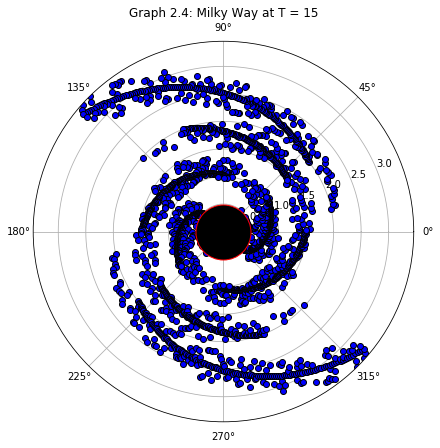

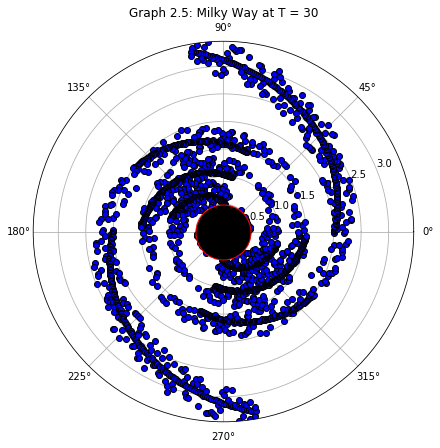

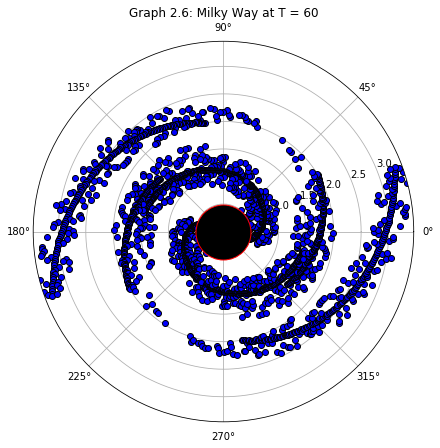

In [11]:
orbital_vs(New_b)
movestars(15)
movestars(30)
movestars(60)
print("Visualization of Milky Way with Observed Rotation Curve")

Image 3: Animated Visualization of Observed Rotational Curve


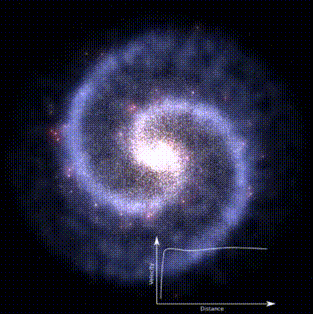

In [12]:
print("Image 3: Animated Visualization of Observed Rotational Curve")
Image(filename = 'DarkMatterRotation.gif', width=500,height=500)
